# Research Engineering Challenge

## Connecting to spacexdata API

In [1]:
import requests
url = 'https://api.spacexdata.com/v3/launches'
payload = {}
headers = {}
response = requests.get('https://api.spacexdata.com/v3/launches', headers = headers, data = payload)

## Generating database.

In [2]:
print(response.headers["content-type"])

application/json; charset=utf-8


Convert JSON to csv.

In [3]:
import json
import csv

db = json.loads(response.text)
spacex_data = open('SpaceXData.csv', 'w')
csvwriter = csv.writer(spacex_data)

count = 0

for launch in db:
      if count == 0:
             header = launch.keys()
             csvwriter.writerow(header)
             count += 1
      csvwriter.writerow(launch.values())
spacex_data.close()

Load csv file into pandas dataframe.

In [4]:
import pandas as pd

# Dropping 4 lines that have to many fields
v3_launches = pd.read_csv("SpaceXData.csv", error_bad_lines=False, encoding='latin1')

b'Skipping line 169: expected 24 fields, saw 30\nSkipping line 173: expected 24 fields, saw 30\nSkipping line 177: expected 24 fields, saw 30\nSkipping line 201: expected 24 fields, saw 30\n'


## Data cleaning

Database first 6 rows:

In [5]:
v3_launches.head(6)

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,telemetry,launch_site,launch_success,launch_failure_details,links,details,static_fire_date_utc,static_fire_date_unix,timeline,crew
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,{'flight_club': None},"{'site_id': 'kwajalein_atoll', 'site_name': 'K...",False,"{'time': 33, 'altitude': None, 'reason': 'merl...",{'mission_patch': 'https://images2.imgbox.com/...,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,{'webcast_liftoff': 54},NaN
1,2,DemoSat,[],2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,False,...,"{'site_id': 'kwajalein_atoll', 'site_name': 'K...",False,"{'time': 301, 'altitude': 289, 'reason': 'harm...",{'mission_patch': 'https://images2.imgbox.com/...,Successful first stage burn and transition to ...,False,NaN,NaN,{'webcast_liftoff': 60},NaN
2,3,Trailblazer,[],2008,1217648040,2008-08-02T03:34:00.000Z,2008-08-02T15:34:00+12:00,False,hour,False,...,"{'site_id': 'kwajalein_atoll', 'site_name': 'K...",False,"{'time': 140, 'altitude': 35, 'reason': 'resid...",{'mission_patch': 'https://images2.imgbox.com/...,Residual stage 1 thrust led to collision betwe...,False,NaN,NaN,{'webcast_liftoff': 14},NaN
3,4,RatSat,[],2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,False,...,"{'site_id': 'kwajalein_atoll', 'site_name': 'K...",True,{'mission_patch': 'https://images2.imgbox.com/...,Ratsat was carried to orbit on the first succe...,False,2008-09-20T00:00:00.000Z,1221868800,{'webcast_liftoff': 5},NaN,NaN
4,5,RazakSat,[],2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,False,...,"{'site_id': 'kwajalein_atoll', 'site_name': 'K...",True,{'mission_patch': 'https://images2.imgbox.com/...,NaN,False,NaN,NaN,{'webcast_liftoff': 5},NaN,NaN
5,6,Falcon 9 Test Flight,['EE86F74'],2010,1275677100,2010-06-04T18:45:00.000Z,2010-06-04T14:45:00-04:00,False,hour,False,...,"{'site_id': 'ccafs_slc_40', 'site_name': 'CCAF...",True,{'mission_patch': 'https://images2.imgbox.com/...,NaN,False,2010-03-13T00:00:00.000Z,1268438400,"{'webcast_liftoff': 123, 'go_for_prop_loading'...",NaN,NaN


Database columns:

In [6]:
v3_launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
flight_number              100 non-null int64
mission_name               100 non-null object
mission_id                 100 non-null object
upcoming                   100 non-null object
launch_year                100 non-null int64
launch_date_unix           100 non-null object
launch_date_utc            100 non-null object
launch_date_local          100 non-null object
is_tentative               100 non-null object
tentative_max_precision    100 non-null object
tbd                        82 non-null object
launch_window              100 non-null object
rocket                     100 non-null object
ships                      100 non-null object
telemetry                  100 non-null object
launch_site                83 non-null object
launch_success             100 non-null object
launch_failure_details     77 non-null object
links                      100 non-null object
details 

In [7]:
v3_launches.columns

Index(['flight_number', 'mission_name', 'mission_id', 'upcoming',
       'launch_year', 'launch_date_unix', 'launch_date_utc',
       'launch_date_local', 'is_tentative', 'tentative_max_precision', 'tbd',
       'launch_window', 'rocket', 'ships', 'telemetry', 'launch_site',
       'launch_success', 'launch_failure_details', 'links', 'details',
       'static_fire_date_utc', 'static_fire_date_unix', 'timeline', 'crew'],
      dtype='object')

Deleting all columns containing dates except launch_date_utc.

In [8]:
v3_launches = v3_launches.drop(['upcoming','launch_year', 'launch_date_unix','launch_date_local'], axis=1)

Dropping columns that are not necessery for further analyze.

In [9]:
v3_launches = v3_launches.drop(['mission_id', 'mission_name', 'is_tentative', 'tentative_max_precision', 'tbd', 'ships', 'telemetry', 'links', 'details', 'static_fire_date_utc', 'static_fire_date_unix', 'timeline', 'crew'], axis=1)
v3_launches.head(6)

,flight_number,launch_date_utc,launch_window,rocket,launch_site,launch_success,launch_failure_details
0,1,2006-03-24T22:30:00.000Z,0,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...","{'site_id': 'kwajalein_atoll', 'site_name': 'K...",False,"{'time': 33, 'altitude': None, 'reason': 'merl..."
1,2,2007-03-21T13:10:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",[],False,"{'time': 301, 'altitude': 289, 'reason': 'harm...",{'mission_patch': 'https://images2.imgbox.com/...
2,3,2008-08-02T15:34:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",[],False,"{'time': 140, 'altitude': 35, 'reason': 'resid...",{'mission_patch': 'https://images2.imgbox.com/...
3,4,2008-09-28T11:15:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",[],True,{'mission_patch': 'https://images2.imgbox.com/...,Ratsat was carried to orbit on the first succe...
4,5,2009-07-13T15:35:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",[],True,{'mission_patch': 'https://images2.imgbox.com/...,NaN
5,6,2010-06-04T14:45:00-04:00,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",[],True,{'mission_patch': 'https://images2.imgbox.com/...,NaN


First row of dataset is shifted right from launch_window column.

Fixing 1st row of launch_window, launch_site and launch success columns. Deleting rocket and launch_failure_details columns.

Changing column names.

In [10]:
v3_launches.loc[0,"launch_window"] = v3_launches.loc[0,"rocket"]
v3_launches.loc[0,"launch_site"] = v3_launches.loc[0,"launch_success"]
v3_launches = v3_launches.drop(['rocket', 'launch_success', 'launch_failure_details'], axis=1)
v3_launches.rename(columns = {"launch_date_utc": "date", "launch_window": "rocket", "launch_site":"launch_success"}, inplace = True) 
v3_launches.head()

,flight_number,date,rocket,launch_success
0,1,2006-03-24T22:30:00.000Z,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",False
1,2,2007-03-21T13:10:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",False
2,3,2008-08-02T15:34:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",False
3,4,2008-09-28T11:15:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",True
4,5,2009-07-13T15:35:00+12:00,"{'rocket_id': 'falcon1', 'rocket_name': 'Falco...",True


Changing format of UTC time to datetime.

In [11]:
import datetime

v3_launches.loc[:,"date"] = v3_launches.loc[:,"date"].str[:10]
v3_launches['date'] = pd.to_datetime(v3_launches["date"])

Lets sort rows by dates.

In [12]:
v3_launches = v3_launches.sort_values(by=['date'])
v3_launches.tail() 

,flight_number,date,rocket,launch_success
94,98,2020-04-30,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",NaN
96,101,2020-06-30,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",NaN
97,102,2020-07-31,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",NaN
98,103,2020-08-31,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",NaN
99,104,2020-09-30,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",NaN


Deleting all rows containing future starts.

In [13]:
# Deleting rows with future starts.
now = datetime.datetime.now()
v3_launches = v3_launches[v3_launches.date < now]

v3_launches.tail() 

,flight_number,date,rocket,launch_success
78,79,2019-05-23,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",True
79,80,2019-06-12,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",True
80,81,2019-06-24,"{'rocket_id': 'falconheavy', 'rocket_name': 'F...",True
81,82,2019-07-25,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",True
82,83,2019-08-06,"{'rocket_id': 'falcon9', 'rocket_name': 'Falco...",True


Extracting information from rocket column and adding them to new columns.

In [14]:
rocket_name = []
reused = []
landing_intent = []
land_success = []

for index, row in v3_launches.iterrows():
    rocket_name.append(eval(row['rocket'])['rocket_name'])
    reused.append(eval(row['rocket'])['first_stage']['cores'][0]['reused'])
    land_success.append(eval(row['rocket'])['first_stage']['cores'][0]['land_success'])
    landing_intent.append(eval(row['rocket'])['first_stage']['cores'][0]['landing_intent'])
    
v3_launches['rocket_name'] = rocket_name
v3_launches['reused'] = reused
v3_launches['landing_intent'] = landing_intent
v3_launches['land_success'] = land_success

# Deleting rocket column.
v3_launches = v3_launches.drop('rocket', axis=1)

Filling NaN rows in land_success columns as NA - not attempted.

In [15]:
v3_launches['land_success'].fillna(0, inplace=True)

Deleting rows with NaN values.

In [16]:
v3_launches.dropna(inplace=True)
v3_launches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 7 columns):
flight_number     83 non-null int64
date              83 non-null datetime64[ns]
launch_success    83 non-null object
rocket_name       83 non-null object
reused            83 non-null object
landing_intent    83 non-null object
land_success      83 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.2+ KB


Index reseting.

In [17]:
v3_launches.reset_index(drop=True)

,flight_number,date,launch_success,rocket_name,reused,landing_intent,land_success
0,1,2006-03-24,False,Falcon 1,False,False,0
1,2,2007-03-21,False,Falcon 1,False,False,0
2,3,2008-08-02,False,Falcon 1,False,False,0
3,4,2008-09-28,True,Falcon 1,False,False,0
4,5,2009-07-13,True,Falcon 1,False,False,0
...,...,...,...,...,...,...,...
78,79,2019-05-23,True,Falcon 9,True,True,True
79,80,2019-06-12,True,Falcon 9,True,True,True
80,81,2019-06-24,True,Falcon Heavy,False,True,False
81,82,2019-07-25,True,Falcon 9,True,True,True


## Data analysis

In [18]:
import matplotlib.pyplot as plt

### Start success rate analysis.

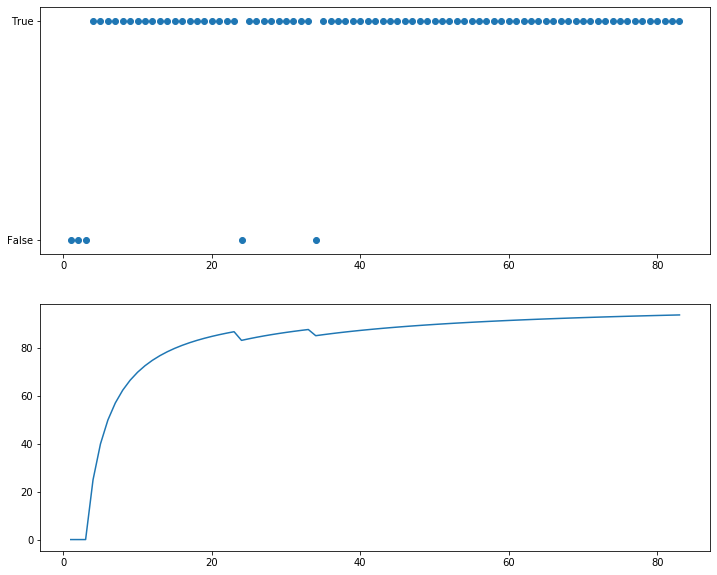

In [58]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Creating start success percentage column
_iter = 0
_success_sum = 0
_success_ratio = []
for index, row in v3_launches.iterrows():
    _iter += 1
    if row['launch_success'] == 'True':
        _success_sum += 1
    _success_ratio.append(_success_sum/_iter * 100)
    
ax1.scatter(v3_launches['flight_number'][:], v3_launches['launch_success'][:])
ax2.plot(v3_launches['flight_number'][:], _success_ratio[:])

We can see, that since 2017 every start was a success. In summary, over 90% starts were successful.

### Falcon 9 used first stage usage.

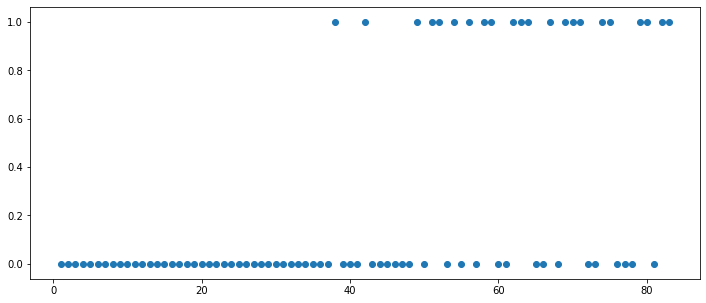

In [37]:
plt.figure(figsize=(12,5))
plt.scatter(v3_launches['flight_number'][:], v3_launches['reused'][:])
plt.show()

We can observe an increase in the frequency of use of the used first stage of the Falcon 9 rocket.

### Landings.

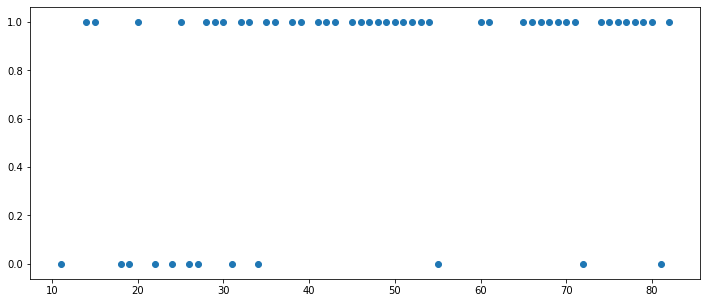

In [39]:
plt.figure(figsize=(12,5))
plt.scatter(v3_launches[v3_launches.landing_intent == True]['flight_number'][:], v3_launches[v3_launches.landing_intent == True]['land_success'][:])
plt.show()

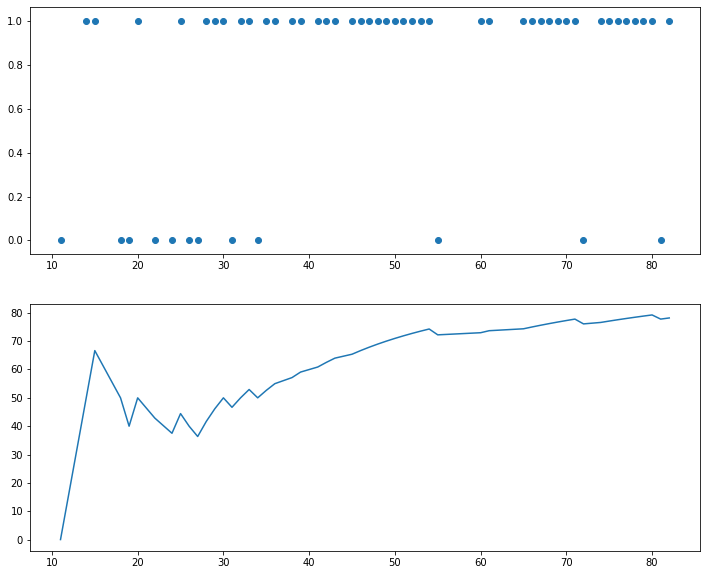

In [52]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Creating landing success percentage column
_iter = 0
_success_sum = 0
_success_ratio = []
for index, row in v3_launches[v3_launches.landing_intent == True].iterrows():
    _iter += 1
    if row['land_success'] == True:
        _success_sum += 1
    _success_ratio.append(_success_sum/_iter * 100)

ax1.scatter(v3_launches[v3_launches.landing_intent == True]['flight_number'][:], v3_launches[v3_launches.landing_intent == True]['land_success'][:])
ax2.plot(v3_launches[v3_launches.landing_intent == True]['flight_number'][:], _success_ratio[:])

As we can see, landing success ratio is increasing. It shows, that SpaceX company is capable of performing innovative vertical rocket landing process.